In [1]:
!pip install matplotlib deap

gen	nevals	avg    	min    
0  	300   	336.017	3.14168
1  	220   	323.969	2.2653 
2  	240   	321.723	2.70856
3  	229   	312.979	4.02599
4  	228   	307.962	3.17087
5  	218   	304.037	3.14168
6  	220   	296.303	1.67043
7  	232   	284.062	0.751507
8  	223   	271.07 	1.71911 
9  	219   	259.333	3.49172 
10 	251   	251.634	0.817368
11 	221   	241.863	0.817368
12 	221   	236.474	0.817368
13 	212   	236.036	2.71605 
14 	216   	230.732	3.56024 
15 	222   	226.918	4.57579 
16 	229   	221.864	1.94468 
17 	230   	219.028	0.817368
18 	228   	218.827	4.57579 
19 	244   	219.83 	4.57579 
20 	223   	214.5  	4.57579 
21 	222   	215.259	4.88265 
22 	223   	208.793	4.88265 
23 	218   	205.938	4.88265 
24 	240   	207.089	4.78725 
25 	227   	208.071	4.78725 
26 	235   	206.196	4.88265 
27 	235   	206.039	6.20808 
28 	235   	204.969	4.88265 
29 	240   	206.747	4.88265 
30 	235   	203.8  	4.88265 
31 	232   	202.813	4.88265 
32 	229   	203.81 	9.20446 
33 	243   	205.405	4.88265 
34 	214   	203.881	6.20808 


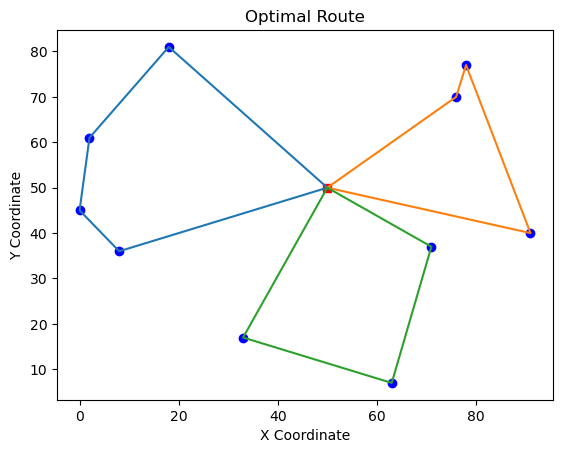

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms


In [3]:

num_locations = 100 
locations = [(random.randint(0, 1000), random.randint(0, 1000)) for _ in range(num_locations)] 
depot = (500, 500)
num_vehicles = 10



In [4]:


creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin) 

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)  
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) 
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


/opt/anaconda3/lib/python3.13/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/opt/anaconda3/lib/python3.13/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [5]:

def evalVRP(individual):
    total_distance = 0
    distances = [] 
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP) 
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)  


In [6]:

def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


In [9]:

def main():
    random.seed(42) 
    pop = toolbox.population(n=300)  
    hof = tools.HallOfFame(1) 

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof


gen	nevals	avg    	min    
0  	300   	26992.5	358.487
1  	224   	26587.4	255.651
2  	235   	26260.6	380.533
3  	225   	25972.5	358.064
4  	236   	26161.9	348.138
5  	224   	25948.7	348.138
6  	215   	25803.3	300.044
7  	233   	25794.1	293.725
8  	259   	25698.8	293.725
9  	222   	25571.9	270.101
10 	230   	25524.7	270.101
11 	235   	25515.1	350.134
12 	243   	25487.9	376.848
13 	235   	25359.2	300.448
14 	215   	25186.5	307.701
15 	224   	25055.4	348.569
16 	224   	25055.1	291.795
17 	238   	25090  	290.418
18 	204   	24876.2	386.213
19 	223   	24792.7	356.087
20 	221   	24676  	342.638
21 	212   	24676.8	312.738
22 	239   	24519.1	339.148
23 	243   	24693.5	359.377
24 	216   	24523.2	281.341
25 	245   	24408.3	267.257
26 	222   	24309  	290.021
27 	237   	24077.3	193.287
28 	212   	23836.1	334.164
29 	236   	23614.9	215.243
30 	234   	23246.9	215.243
31 	227   	22965.4	215.243
32 	231   	22768.1	215.243
33 	235   	22453.1	219.162
34 	214   	22332  	219.162
35 	222   	22108.5	308.814
3

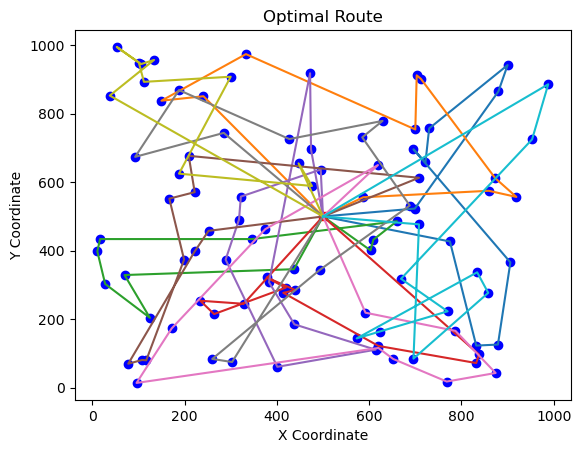

In [10]:

if __name__ == "__main__":
    main()
